In [23]:
import pandas as pd
import numpy as np


num_cities = 1000

np.random.seed(107)

cities = []
for i in range(num_cities):
    city = {
        'Population': np.random.randint(1000, 1000000),
        'Latitude': np.random.uniform(0, 40),
        'Longitude': np.random.uniform(0, 60),
        'Area': np.random.randint(50, 1000),
        'GDP': np.random.uniform(0, 100),
        'High education': np.random.uniform(0, 0.4),
        'Ad budget': np.random.uniform(0, 1000000)
    }
    
    
    city['Income'] = (
        city['GDP'] * city['Population'] * 0.001 +
        city['High education'] * 50000 +
        city['Ad budget'] * 0.0001 +
        city['Area'] * 10 +
        (40 - city['Latitude']) * 1000 +
        (60 - city['Longitude']) * 1000
    )

    cities.append(city)


df = pd.DataFrame(cities)
df.head()


,Population,Latitude,Longitude,Area,GDP,High education,Ad budget,Income
0,461862,39.642326,32.172610,381,22.526441,0.136505,152491.226921,49239.655830
1,948090,27.759139,21.799416,603,59.977281,0.388389,702063.933425,132824.940405
2,956048,28.593951,7.735642,513,20.939241,0.315871,818388.601632,104694.723046
3,780270,29.406730,2.384702,674,54.931801,0.032674,460493.313714,119489.933304
4,19953,17.394419,17.878825,647,25.797180,0.398341,384495.324809,91667.006378


In [24]:
df.describe()


,Population,Latitude,Longitude,Area,GDP,High education,Ad budget,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,515703.707000,20.147581,30.302479,533.591000,49.847640,0.203897,527618.656276,90326.799366
std,293045.708559,11.684053,17.229299,279.384537,28.664781,0.114938,289779.346160,31730.835803
min,1088.000000,0.088911,0.192607,50.000000,0.029629,0.000400,418.760584,14664.946771
25%,264985.000000,9.866471,15.156207,294.000000,25.233594,0.103793,292320.989811,66903.494327
50%,531627.000000,20.118074,31.126230,532.500000,49.948255,0.210346,535226.074122,87339.912215
75%,770180.000000,30.327029,44.683321,777.500000,74.109028,0.302843,778585.202525,109485.960537
max,997646.000000,39.994837,59.909616,999.000000,99.791021,0.399598,999787.641831,198608.922026


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[['Population', 'Latitude', 'Longitude', 'Area', 'GDP', 'High education', 'Ad budget']].values
y = df['Income'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  
    Dense(16, activation='relu'),  
    Dense(1)  
])


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9017397248.0000 - val_loss: 8718778368.0000
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9086830592.0000 - val_loss: 8718455808.0000
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9332659200.0000 - val_loss: 8717523968.0000
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9012916224.0000 - val_loss: 8715057152.0000
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9138948096.0000 - val_loss: 8709426176.0000
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9443054592.0000 - val_loss: 8698056704.0000
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9300642816.0000 - val_loss: 8677055488.0000
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9213123584.0000 - val_loss: 8641344512.0000
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8876329984.0000 - val_loss: 8584600064.0000
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8981180416.00

In [59]:
evaluated = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 659281280.0000


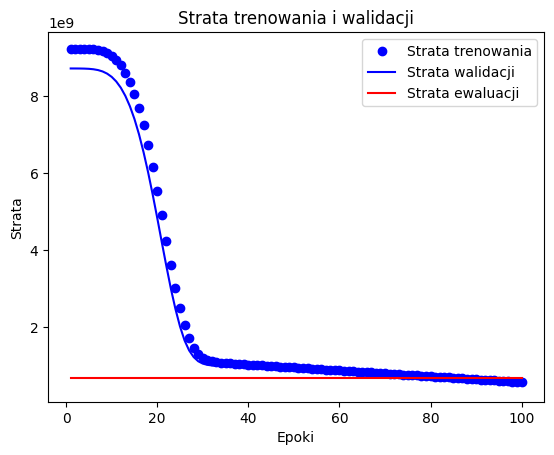

In [60]:
history_dict = history.history


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')

# plot evaluation
# evaluated = model.evaluate(X_test, y_test)
plt.plot(epochs, [evaluated] * len(epochs), 'r', label='Strata ewaluacji')

plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()


In [61]:
model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[ 83580.016],
       [ 73421.234],
       [103180.   ],
       [ 64307.74 ],
       [107018.81 ],
       [ 86434.8  ],
       [110545.13 ],
       [ 91466.41 ],
       [ 83195.7  ],
       [101964.51 ]], dtype=float32)

In [62]:
y_test[:10]

array([139854.54245987,  64455.29606873, 131325.86018388,  74511.08594123,
       114235.42788748,  40298.02999583, 121179.08380154,  76722.59438476,
        91194.70060584,  91335.82313697])